In [61]:
from numpy import loadtxt
import numpy as np
import pandas as pd
import os
import fnmatch
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
df=pd.read_csv("/Users/msi/dataset/pure_data.csv")
df

,1,2,3,4,5,6,7,8,9,10,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,label
0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,...,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0
1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,...,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0
2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,...,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0
3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,...,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0
4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,...,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,1
496,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,...,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,1
497,-438.0,-561.0,-622.0,-581.0,-460.0,-295.0,-164.0,-70.0,3.0,66.0,...,443.0,399.0,319.0,196.0,40.0,-47.0,-118.0,-163.0,-56.0,1
498,-476.0,-518.0,-521.0,-362.0,-68.0,175.0,289.0,184.0,15.0,-130.0,...,-261.0,-248.0,-147.0,36.0,224.0,299.0,246.0,556.0,276.0,1


In [63]:
print ("DATA SHAPES : ",df.shape)
df.info()

DATA SHAPES :  (500, 4098)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 4098 entries, 1 to label
dtypes: float64(4097), int64(1)
memory usage: 15.6 MB


In [64]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,label
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-3.718000,-9.802000,-16.094000,-18.820000,-16.662000,-12.124000,-6.510000,-2.142000,1.882000,4.438000,...,-4.05600,-2.632000,-1.928000,-2.03800,-1.184000,0.928000,1.132000,-0.770000,-18.544000,0.200000
std,145.274622,163.176469,188.246611,201.245888,188.973686,165.080719,153.637922,155.370054,155.850617,155.882831,...,172.97619,166.175453,167.097438,177.47457,181.666176,173.855683,148.916496,119.354128,216.793244,0.400401
min,-985.000000,-1221.000000,-1406.000000,-1395.000000,-1291.000000,-880.000000,-998.000000,-1156.000000,-1009.000000,-665.000000,...,-1224.00000,-1094.000000,-1400.000000,-1697.00000,-1547.000000,-1120.000000,-1073.000000,-734.000000,-1852.000000,0.000000
25%,-48.250000,-54.000000,-52.000000,-52.250000,-53.000000,-57.250000,-55.000000,-56.000000,-58.250000,-57.000000,...,-48.25000,-47.000000,-48.250000,-51.00000,-56.250000,-56.250000,-48.250000,-48.000000,-54.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-9.000000,-8.500000,-7.000000,-5.000000,-7.000000,-5.000000,-5.000000,...,-9.50000,-7.000000,-9.500000,-6.50000,-7.000000,-5.000000,-5.000000,-4.500000,-11.000000,0.000000
75%,36.000000,36.250000,37.250000,38.000000,41.000000,40.000000,38.250000,36.000000,36.000000,32.250000,...,32.00000,34.000000,39.000000,41.25000,42.000000,46.000000,39.000000,31.250000,30.000000,0.000000
max,800.000000,839.000000,857.000000,876.000000,893.000000,928.000000,973.000000,1045.000000,1381.000000,1502.000000,...,911.00000,914.000000,919.000000,916.00000,829.000000,781.000000,703.000000,677.000000,1002.000000,1.000000


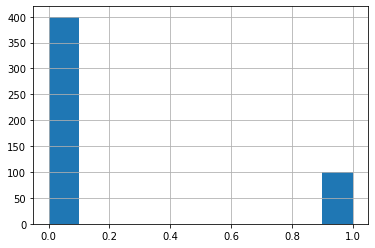

In [65]:
df['label'].hist()
#Not BaLANCED DATASET

In [6]:
print(df.isna().sum().sort_values(ascending=False))

label    0
1025     0
1375     0
1374     0
1373     0
        ..
2727     0
2726     0
2725     0
2724     0
1        0
Length: 4098, dtype: int64


In [7]:
###Statistical Test to determine whether input features are relevant to the outcome to be predicted.

###P-value <= 0.05 significant result
###P-value > 0.05 not significant result

In [8]:

statistical_significance=[]
for attr in range(1,4098):
    data_count=pd.crosstab(df[str(attr)],df["label"])
    #print(data_count)
    obs=data_count.values
    #print(obs)
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance)

,Attribute,P-value
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
4092,4093,0.0
4093,4094,0.0
4094,4095,0.0
4095,4096,0.0


In [9]:
statistical_significance['P-value'].unique()


array([0.    , 0.0002, 0.0001, 0.0003, 0.0005, 0.0007, 0.0006, 0.0004,
       0.0008, 0.001 ])

In [66]:
X_corr=df.drop(['label'],axis=1)

In [67]:
X = df.iloc[:,1:4097].values
y=df['label']

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)

In [59]:
x

array([[ 0.19508848,  0.27169238,  0.31744209, ..., -0.08155007,
         0.07355241,  0.44115622],
       [-0.24659351, -0.25474019, -0.35902492, ..., -1.17049755,
        -1.35220687, -0.29299599],
       [-0.07482829, -0.00481766, -0.02576543, ...,  0.01255651,
         0.04000513,  0.46424276],
       ...,
       [-3.38130878, -3.22190562, -2.79629577, ..., -0.80079316,
        -1.36059369, -0.17294594],
       [-3.11752648, -2.68483805, -1.70698492, ...,  1.64597773,
         4.66952937,  1.36000081],
       [ 0.94349409,  1.29797003,  1.38685685, ..., -1.04950338,
         0.05677877, -0.93480201]])

In [69]:

from keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [72]:
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

In [16]:
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,4096),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             1065216   
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 1,077,698
Trainable params: 1,077,698
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
13/13 [==============================] - 3s 92ms/step - loss: 1.1017 - accuracy: 0.2592 - val_loss: 0.6987 - val_accuracy: 0.4700
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6750 - accuracy: 0.5674 - val_loss: 0.4229 - val_accuracy: 0.9100
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3929 - accuracy: 0.9000 - val_loss: 0.3241 - val_accuracy: 0.9200
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2888 - accuracy: 0.9318 - val_loss: 0.2804 - val_accuracy: 0.9300
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.2291 - accuracy: 0.9724 - val_loss: 0.2596 - val_accuracy: 0.9300
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1656 - accuracy: 0.9849 - val_loss: 0.2395 - val_accuracy: 0.9300
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1356 - accuracy: 0.9829 - val_loss: 0.2219 - val_accuracy: 0.9300
Epoch 8/100


In [18]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

(100,)
(100,)
Training Accuracy: 0.95


In [73]:
#simple rnn
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 4096])
])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test))


Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.7661 - val_loss: 0.8092
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7480 - val_loss: 0.8024
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7198 - val_loss: 0.8127
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7213 - val_loss: 0.7997
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7585 - val_loss: 0.7798
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7256 - val_loss: 0.7936
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7862 - val_loss: 0.8432
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7889 - val_loss: 0.8003
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7374 - val_loss: 0.8077
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7337 - val_loss: 0.8130
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.6866 - val_loss: 0.7830
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7321 - val_loss: 0.7924
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7017 - val_loss: 0.7920
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6860 - val_loss: 0.7900
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7035 - val_loss: 0.7940
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7180 - val_loss: 0.7941
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6774 - val_loss: 0.7941
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6699 - val_loss: 0.7966
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7067 - val_loss: 0.7984
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6727 - val_loss: 0.8023
Epoch 93/100


In [74]:
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

Training Accuracy: 0.72


In [20]:
import joblib
import pickle

In [21]:

model.save("flask.h5")
joblib.dump(x, "flask.joblib")

['flask.joblib']

In [ ]:
#Machine learning

In [75]:
y=df['label']

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [44]:
#LR
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred_logist=clf.predict(X[:, :])
clf.score(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [45]:
#arbre de dec
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [47]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [48]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5 )
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [49]:

print('test_score = ', final_model.score(x_test, y_test))


test_score =  0.87


In [50]:
import pickle

In [51]:
pickle.dump(final_model, open('model.pkl','wb'))

In [52]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[80  0]
 [ 9 11]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        80
           1       1.00      0.55      0.71        20

    accuracy                           0.91       100
   macro avg       0.95      0.78      0.83       100
weighted avg       0.92      0.91      0.90       100



Text(0, 0.5, 'Erreur')

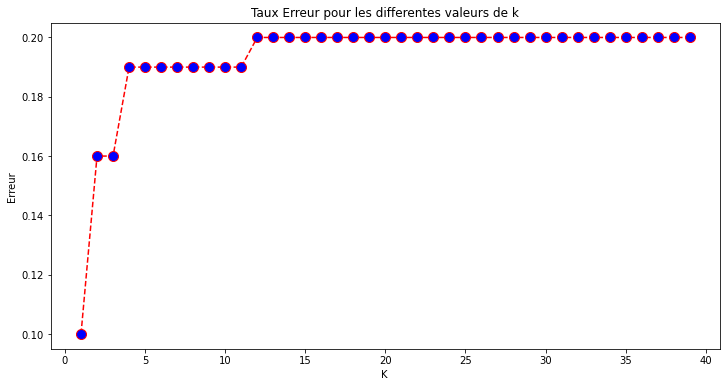

In [53]:

#KNN
error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(x_train, y_train)
    pred_i = knn_model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [54]:
knn = KNeighborsClassifier(2)
knn_model = knn.fit(x_train, y_train)
y_pred_knn =knn_model.predict(x_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.84


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [56]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV

In [57]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [79]:
random_state = 2
classifiers = []
classifiers.append(SVC(kernel='linear'))
classifiers.append(DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier(2))
classifiers.append(LogisticRegression(random_state = random_state))

In [80]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors           Algorithm
0       0.713248        0.134988                 SVM
1       0.818067        0.050094        DecisionTree
2       0.995097        0.004678        RandomForest
3       0.996310        0.001917          ExtraTrees
4       0.995959        0.002705    GradientBoosting
5       0.720915        0.029419         KNeighboors
6       0.716542        0.191524  LogisticRegression


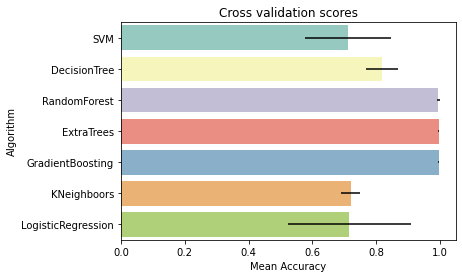

In [81]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVM","DecisionTree",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")